# Case de Ciência de Dados

Duarte Junior

## Descrição do dataset

Para este case foi utilizado o dataset `Electricity ID=150` disponível no [OpenML](https://www.openml.org/search?type=data&sort=runs&id=151&status=active).

<p align='justify'>O `Electricity` é um dataset descrito por M. Harries e analisado por J. Gama (ver artigos abaixo). Esses dados foram coletados do mercado de energia elétrica australiano de New South Wales. Nesse mercado, os preços não são fixos e são afetados pela demanda e oferta do mercado e são definidos a cada cinco minutos. As transferências de energia elétrica de/para o estado vizinho de Victoria foram feitas para aliviar as flutuações.</p>

<p align='justify'>O conjunto de dados (originalmente denominado ELEC2) contém 45.312 instâncias datadas de 7 de maio de 1996 a 5 de dezembro de 1998. Cada exemplo do conjunto de dados refere-se a um período de 30 minutos, ou seja, há 48 instâncias para cada período de um dia. Cada exemplo no conjunto de dados têm 5 campos: o dia da semana, o carimbo de hora, a demanda de eletricidade de New South Wales, a demanda de eletricidade de Victoria, a transferência de eletricidade programada entre estados e o rótulo da classe. O rótulo da classe identifica a mudança do preço (UP ou DOWN) em New South Wales em relação a uma média móvel das últimas 24 horas (e remove o impacto das tendências de preços de longo prazo).</p>

Os dados foram normalizados por A. Bifet.

## Descrição dos Dados

| Nome        | Descrição                                                              | Range                            | Tipo
| --          | --                                                                     | --                               | --
| Date        | Data entre 7 de maio de 1996 a 5 dezembro de 1998.                     | Normalizado entre 0 e 1          | Numérico
| Day         | Dia da semana                                                          | Range entre 1 e 7                | Categórico
| Period      | Hora da medição (1-48) em intervalos de meia hora ao longo de 24 horas.| Normalizado entre 0 e 1          | Numérico
| NSWprice    | Preço da eletricidade em New South Wales                               | Normalizado entre 0 e 1          | Numérico
| NSWdemand   | Demanda de eletricidade em New South Wales                             | Normalizado entre 0 e 1          | Numérico
| VICprice    | Preço da eletricidade em Victoria                                      | Normalizado entre 0 e 1          | Numérico
| VICdemand   | Demanda de eletricidade em Victoria                                    | Normalizado entre 0 e 1          | Numérico
| transfer    | Transferência programada de eletricidade entre os dois estados         | Normalizado entre 0 e 1          | Numérico
| class(target)| Preço da eletricidade em NSW acima/abaixo da média de 24 horas        | 1 (Acima/UP) ou 0 (abaixo/DOWN)  | Numérico

## Artigos
M. Harries. [Splice-2 comparative evaluation: Electricity pricing](https://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=BCB2570AC299719CEA236621B98F4387?doi=10.1.1.12.9405&rep=rep1&type=pdf). Technical report, The University of South Wales, 1999.

J. Gama, P. Medas, G. Castillo, and P. Rodrigues. [Learning with drift detection](https://dl.acm.org/doi/abs/10.1145/2523813). In SBIA Brazilian Symposium on Artificial Intelligence, pages 286–295, 2004.

## Objetivo

O objetivo deste case é criar um modelo de Machine Learning capaz de predizer se a tarifa de eletricidade em New South Wales estará acima ou abaixo da tarifa média das últimas 24 horas.

## Implementação da solução do problema

### Importação das bibliotecas necessárias

In [61]:
from sklearn import datasets as ds
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Leitura do dataset

In [62]:
df = ds.fetch_openml(data_id=151, as_frame=True, return_X_y=True)                # Carrega o dataset a partir do repositório do OpenML
df = pd.concat(df, axis=1).assign(target=lambda x: (x['class'] == 'UP') * 1)     # Adiciona a coluna target com a representação numérica das classes UP e DOWN

## Explorando o dataset



Explorar a base de dados é uma importante etapa do processo de construção de um modelo de Machine Learning. É nesta etapa que identificamos possíveis inconsistências nos dados fornecidos tais como: outliers, dados faltantes, informações incorretas. Esta análise também nos permite identificar padrões nos dados que podem gerar conhecimentos úteis para o negócio e auxiliar no processo de modelagem.

**Informações gerais do dataset**

Utilizando o comando `info` são exibidas algumas características do dataset como: tipo dos dados, número de colunas, nomes das colunas, total de linhas, total de valores nulos em cada coluna.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   date       45312 non-null  float64 
 1   day        45312 non-null  category
 2   period     45312 non-null  float64 
 3   nswprice   45312 non-null  float64 
 4   nswdemand  45312 non-null  float64 
 5   vicprice   45312 non-null  float64 
 6   vicdemand  45312 non-null  float64 
 7   transfer   45312 non-null  float64 
 8   class      45312 non-null  category
 9   target     45312 non-null  int32   
dtypes: category(2), float64(7), int32(1)
memory usage: 2.7 MB


O resultado anterior mostra que não há dados faltantes.

A seguir, o comando `describe` mostra algumas das principais métricas estatísticas das variáveis numéricas do conjunto de dados: média, mediana, desvio padrão, máximo, mínimo, 1º quartil (25%), 3º quartil (75%). Este é um comando útil para entender a distribuição dos dados.

Como date e period foram registrados como sendo do tipo numéricas o `describe` realiza, automaticamente, o cálculo para tais métricas, embora não faça sentido matemático o cálculo das métricas estatísticas mencionadas para estas variáveis. Vê-se que a variável **vicprice** é a de menor variabilidade, pois tem o menor desvio padrão (`std`) e também a de menor média do conjunto. Como todas as variáveis numéricas já estão normalizadas (na mesma ordem de grandeza) não será necessário realizar a normalização dos dados em etapas posteriores do processo de modelagem.

In [64]:
df.describe()

,date,period,nswprice,nswdemand,vicprice,vicdemand,transfer,target
count,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000
mean,0.499080,0.500000,0.057868,0.425418,0.003467,0.422915,0.500526,0.424545
std,0.340308,0.294756,0.039991,0.163323,0.010213,0.120965,0.153373,0.494279
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031934,0.250000,0.035127,0.309134,0.002277,0.372346,0.414912,0.000000
50%,0.456329,0.500000,0.048652,0.443693,0.003467,0.422915,0.414912,0.000000
75%,0.880547,0.750000,0.074336,0.536001,0.003467,0.469252,0.605702,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Visualização das primeiras linhas do dataset. Esta visualização nos ajuda a entender a estrutura do dataset.

In [65]:
df.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class,target
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP,1
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP,1
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP,1
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP,1
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN,0


### Análise descritiva dos dados de eletricidade para New South Wales

<p align='justify'>Como o principal objetivo do case está relacionado ao consumo de eletricidade de New South Wales a seguir é realizada uma análise das variáveis relacionadas ao consumo de eletricidade no estado. O objetivo é identificar padrões que possam existir nas séries de dados.<p>

#### Demanda de eletricidade em New South Wales

<p align='justify'>O primeiro gráfico mostra a demanda média de eletricidade em New South Wales ao longo do dia.</p> 

In [127]:
# Definição da função para gerar os gráficos de linha
def grafico_linhas(x, y, title, xlabel, ylabel, minx=0, maxx=24, stepx=1, maxy=1.0, stepy=0.01):
    '''
        Função para gerar gráficos de linhas
        Args:
            y (string): Nome da coluna do dataset que estará no eixo y do gráfico
            title (string): Título do gráfico
            ylabel (string): Label do eixo y
            maxy (float): Limite máximo do eixo y
            stepy (float): Intervalo entre as marcações do eixo y
    '''
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    sns.lineplot(x=x, y=y, ax=ax)
    ax.set_title(title, fontsize=18)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_yticks(np.arange(0, maxy + stepy, stepy).round(2))
    ax.set_yticklabels(np.arange(0, maxy + stepy, stepy).round(2), fontsize=12)
    ax.set_xticks(np.arange(minx, maxx + stepx, stepx))
    ax.set_xlim(minx, maxx)
    ax.spines[['top', 'right']].set_visible(False)
    plt.show()

Plot do gráfico da variação da demanda de energia ao longo do dia.

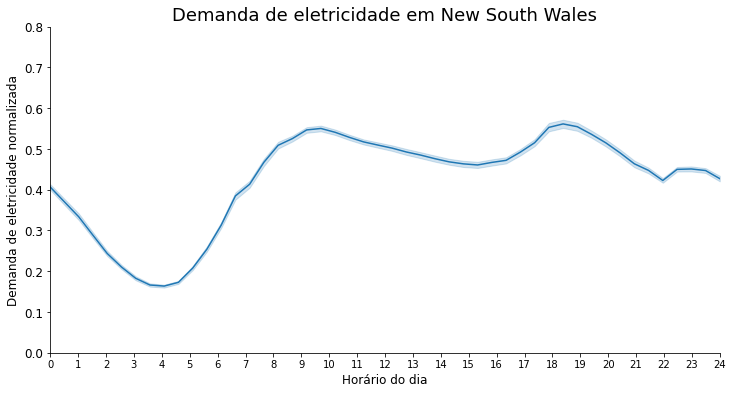

In [128]:
titulo = 'Demanda de eletricidade em New South Wales'
ylabel = 'Demanda de eletricidade normalizada'
xlabel = 'Horário do dia'
maxy = .8
stepy = .1
x = df['period']*24
y = df['nswdemand']

grafico_linhas(x, y, titulo, xlabel, ylabel, maxy=maxy, stepy=stepy)

Este gráfico mostra a variação média da demanda de energia ao longo do dia. Ele é feito calculando-se a média de consumo para cada hora ao longo do tempo. A linha central representa a média e a área sombreada o intervalo de confiança com nível de 95%.

Neste caso, como a área sombreada é pequena, pode-se deduzir que há uma pequena variação na demanda por eletricidade, ou seja, não há grandes flutuações de demanda, para um determinado horário, ao longo do ano.

O gráfico acima mostra um padrão comum aos centros urbanos, uma baixa demanda de eletricidade durante a madrugada (quando a atividade comercial na cidade é baixa) e maior demanda durante o dia (período de maior atividade comercial na cidade). Durante o dia são observados dois picos: o primeiro entre 9 e 10 horas e o segundo próximo às 19 horas. Tais picos geralmente coincidem com o iníco das atividades comerciais e com a chegada dos trabalhadores em casa. Como preço da tarifa de energia está atrelada a demanda é esperado que a variação da tarifa reflita este comportamento como pode ser visto no gráfico a seguir.

#### Variação média do preço da eletricidade em New South Wales.

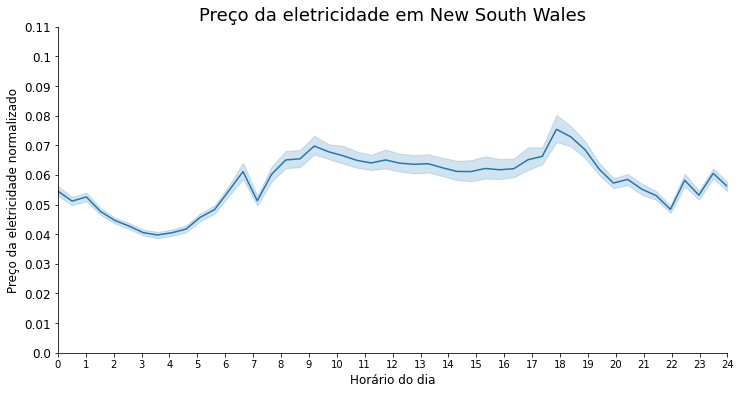

In [129]:
titulo = 'Preço da eletricidade em New South Wales'
ylabel = 'Preço da eletricidade normalizado'
maxy = 0.11
y = df['nswprice']
grafico_linhas(x, y, titulo, xlabel, ylabel, maxy=maxy)

Como esperado, a partir da análise do gráfico de demanda, o valor da tarifa durante a madrugada é menor que no restante do dia. O maior pico de tarifa ocorre entre as 18 e 19 horas, um pouco defasado em relação ao pico de demanda visto no gráfico anterior. No caso do preço da tarifa é observada uma maior variabilidade do que a vista para a demanda, pois a área sombreada é maior, em especial durante o período diurno. Isto indica que, dependendo da época do ano, a tarifa pode estar, em média, mais baixa ou mais alta. Portanto, a tarifa pode estar sendo influenciada por fatores externos além da demanda.

#### Variação da demanda ao longo da semana.

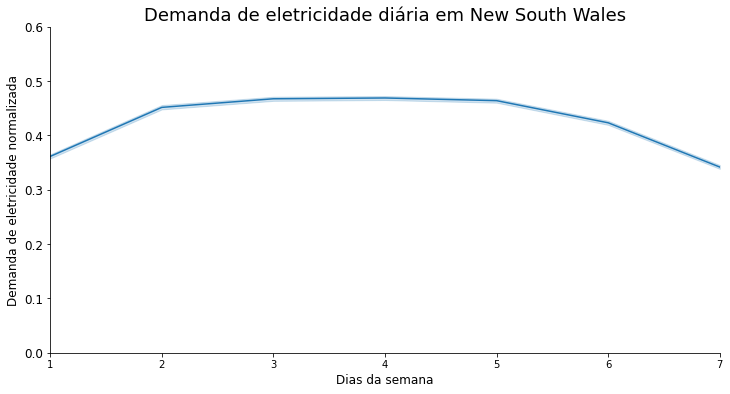

In [130]:
titulo = 'Demanda de eletricidade diária em New South Wales'
ylabel = 'Demanda de eletricidade normalizada'
xlabel = 'Dias da semana'
maxy = .6
stepy = .1
x = df['day']
y = df['nswdemand']
maxx = 6
minx = 0

grafico_linhas(x, y, titulo, xlabel, ylabel, minx=minx, maxx=maxx, maxy=maxy, stepy=stepy)

Considerando que o primeiro dia da semana seja Domingo vê-se que, nesta cidade, as atividades de maior demanda por eletricidade ocorrem durante os dias úteis. Pode-se levantar a hipótese que o principal responsável pelo aumento da demanda na cidade seja a atividade comercial.

#### Médias de demanda e tarifa considerando intervalo de 24 horas

Na célula a seguir é feita a conversão das datas, que originalmente estão normalizadas entre 0 e 1, são convertidas para o formato `datetime`. Esta conversão irá facilitar a manipulação dos dados em função do tempo.

In [83]:
from datetime import datetime

data_inicial = datetime(1996, 5, 7) # Data do primeiro registro
data_final = datetime(1998, 12, 6)  # Data do último registro
intervalo = (data_final - data_inicial) / len(df)
datas = np.array([data_inicial + i*intervalo for i in range(len(df))])
df['date'] = datas
df.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class,target
0,1996-05-07 00:00:00.000000,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP,1
1,1996-05-07 00:29:58.093220,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP,1
2,1996-05-07 00:59:56.186440,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP,1
3,1996-05-07 01:29:54.279660,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP,1
4,1996-05-07 01:59:52.372880,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN,0


Para minimizar o efeito das variações que existem nas medições será avaliada a média de 24 horas da demanda e oferta. Como são realizados 48 registros por dia, esta será a janela de tempo utilizada para calcular a média móvel para as duas variáveis citadas.

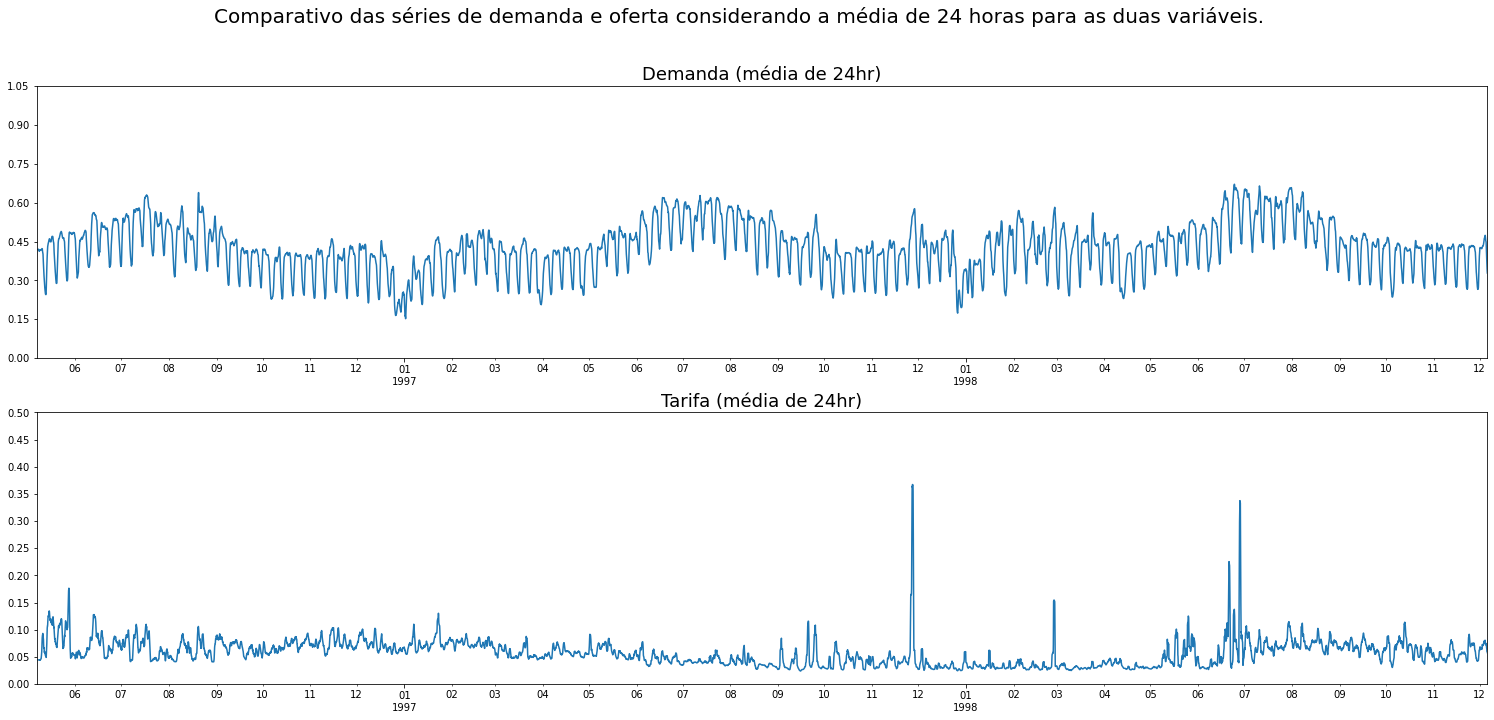

In [126]:
from matplotlib import dates as mdates

fig, axes = plt.subplots(2, 1, figsize=(26,11))
axes[0].plot(df['date'], df['nswdemand'].rolling(48).mean())    # Média móvel de 24 horas da demanda
axes[1].plot(df['date'], df['nswprice'].rolling(48).mean())     # Média móvel de 24 horas da tarifa

anos = mdates.YearLocator()    # cada ano
meses = mdates.MonthLocator()  # cada mes
anoFmt = mdates.DateFormatter('%m\n%Y')
mesFmt = mdates.DateFormatter('%m') 

for i in range(2):
    axes[i].set_xlim(data_inicial, data_final)
    axes[i].xaxis.set_major_locator(anos)
    axes[i].xaxis.set_minor_locator(meses)
    axes[i].xaxis.set_major_formatter(anoFmt)
    axes[i].xaxis.set_minor_formatter(mesFmt)

axes[0].set_title('Demanda (média de 24hr)', fontsize=18)
axes[1].set_title('Tarifa (média de 24hr)', fontsize=18)
axes[0].set_yticks(np.arange(0, 1.05, 0.15))
axes[1].set_yticks(np.arange(0, 0.55, .05))

plt.suptitle('Comparativo das séries de demanda e oferta considerando a média de 24 horas para as duas variáveis.', fontsize=20)
plt.show()


O gráfico da demanda média de 24 horas mostra que existe um sinal de sazonalidade em escala semanal. Este sinal está de acordo com o resultado exibido no gráfico "Demanda de eletricidade diária em New South Wales" que mostra haver, em média, uma maior demanda de eletriciddade durante os dias úteis e redução durante os fins de semana. Apesar do ruído causado por esta sazonalidade também pode-ser percerber um outro padrão de sazonalidade em escala mensal. Durante os meses de junho a setembro há uma maior demanda de eletricidade, este período coincide com o inverno, que no estado de NSW costuma ter temperaturas baixas. No mês de janeiro são registradas as menores demandas de eletricidade. Entre os meses de dezembro e fevereiro é ocorre a estação do verão.

Quanto a variação da tarifa média, não são observados sinais de sazonalidade tão evidentes quantos os existentes na série de demanda. Observa-se que durante os anos de 1997 até meados de 1998, executando-se alguns picos, houve menor variabilidade na tarifa e uma tendência de diminuição dos preços. Durante este período estava ocorrendo a reforma do mercado de energia australino. Até meados de 1997 os sistemas elétricos estavam isolados, não havia uma conexão entre os estados, e havia o monopólio estatal sobre o mercado de energia. Em 1997 efetivou-se a conexão entre os sistemas elétricos de New South Wales e Victoria, estes foram os primeiros estados a terem seus sistemas elétricos conectados. Ambos os estados tinham excesso de oferta de energia elétrica o que pode ter impulsionado a redução da tarifa no período. Em maio de 1998 o sistema elétrico de Australian Capital Territory foi conectado a rede e em outubro, do mesmo ano, foi a vez de South Australia se conectar ao sistema.

> A seguir estão algumas referências onde pode-se encontrar mais informações sobre o mercado de energia australiano durante este período:

 > CORPORATENAME=COMMONWEALTH PARLIAMENT; ADDRESS=PARLIAMENT HOUSE, C. Electricity Industry Restructuring: The State of Play. text. Disponível em: <https://www.aph.gov.au/about_parliament/parliamentary_departments/parliamentary_library/pubs/rp/rp9798/98rp14>. Acesso em: 25 jun. 2022a. 
 
 > CORPORATENAME=COMMONWEALTH PARLIAMENT; ADDRESS=PARLIAMENT HOUSE, C. Electricity Industry Restructuring-A Chronology. text. Disponível em: <https://www.aph.gov.au/About_Parliament/Parliamentary_Departments/Parliamentary_Library/Publications_Archive/Background_Papers/bp9798/98bp21>. Acesso em: 25 jun. 2022b. 




Com esta análise inicial temos informações sobre o perfil de consumo da população do estado. Tais informações podem ser úteis para os gestores do sistema elétrico. O qual deve ser gerido de forma a garantir que a potência elétrica disponível na rede não esteja muito acima ou abaixo da demanda. Se um desses casos ocorrer há o risco do sistema vir a colapsar. O que deixaria vários clientes sem o fornecimento de energia elétrica, significando prejuízo para a companhia energética. 

Com a informação sobre o consumo médio dos clientes e períodos de pico a companhia pode elaborar planos de operação capazes de atender a demanda prevista com a máxima eficiência possível.

Já do lado do cliente, sabendo-se em quais períodos do dia, em média, a fatura é mais alta ele pode tentar mudar seus horários de máximo consumo a fim de economizar na fatura. Indústrias podem, quando possível, automatizar processos para que sejam executados durante o horário de menor tarifa.

## Desenvolvimento do Modelo de Machine Learning

### Seleção de variáveis

Para a composição do conjunto de variáveis independentes (X) serão removidas as variáveis: `date`, `class`, `target`, `nswprice`, `vicprice`

A remoção da variável `date` é justificada porque cada data é única e como não há repetição de eventos um modelo que considere data como atributo terá dificuldades de realizar previsões fora do período em que foi treinado.

`class` e `target` não são incluídas no conjunto X porque representam exatamente a variável de interesse.

Assim como o realizado no trabalho original de M. Harries as variáveis `nswprice` e `vicprice` foram removidas pois, o interesse deste projeto é realizar a predição se a tarifa estará acima ou abaixo da média das últimas 24 horas. Como as predições serão realizadas antes que as informações de tarifa estejam disponíveis não se pode utilizá-las na modelagem. Caso o valor das tarifas já estivesse disponível, no momento da predição, não seria necessário o uso de um modelo de Machine Learning pois, bastaria cálcular a média das tarifas passadas e compará-las com o preço atual.

Para o conjunto da variável dependente (y) será utilizada a coluna `target` que é uma representação numérica de `class`.

In [131]:
X = df.drop(['date', 'class', 'target', 'nswprice', 'vicprice'], axis=1)
y = df['target']

### Criação de variáveis

A seguir serão criadas duas variáveis, derivadas a partir das variáveis originais do dataset, que poderão melhorar o desempenho do modelo.

A primeira variável refere-se ao mês em que a medição foi realizada. Como foi identificado que existe um padrão de variablidade em escala mensal na série de demanda, esta variável permitirá incorporar tal sinal de variabilidade no modelo.

In [132]:
X['month'] = [dt.month for dt in df.date]

A segunda variável, que será incluída no grupo de variáveis preditoras, é o sinal de tendência (`target`) no instante anterior ao registro, aqui chamado de lag-1.

In [133]:
import numpy as np

X['lag-1'] = np.nan
X['lag-1'][1:] = y[:-1]
X.dropna(inplace=True)

y = y[1:]

C:\Users\duart\AppData\Local\Temp/ipykernel_24512/184013357.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['lag-1'][1:] = y[:-1]


### Separação dos conjuntos de treino e teste

Devido estarmos trabalhou-se com séries de dados temporais os conjuntos de treino e teste serão divididos de modo que 30% dos registros mais recentes sejam utilizados para teste e o restante para o treino

In [134]:
split = int(len(df) * 0.7)
X_train = X.loc[:split]
y_train = y.loc[:split]

X_test = X.loc[split:]
y_test = y.loc[split:]

#### Distribuição da variável alvo nos grupos de treino e teste

In [137]:
y_train.value_counts(normalize=True).round(2)*100

0    58.0
1    42.0
Name: target, dtype: float64

In [136]:
y_test.value_counts(normalize=True).round(2)*100

0    57.0
1    43.0
Name: target, dtype: float64

A distribuição da variável alvo é praticamente a mesma nos conjuntos de treino e teste.

| Classe | Treino | Teste |
| - | - | - |
| Abaixo da média | 58% | 57 % |
| Acima da média | 42% | 43 % |

Isto indica que possívelmente exista uma constância no padrão de variabilidade da tarifa que possa ser estudado posteriormente.

### Validação cruzada

Uma prática comum em Machine Learning é a divisão do conjunto de dados em apenas dois subconjuntos: teste e treino. O conjunto de treino é utilizado para treinar o modelo, ou seja, realizar o ajuste dos parâmetros do modelo. E o de teste para avaliar o desempenho do modelo. O problema desta técnica é que o desempenho do modelo fica dependente da aleatoriedade. Como a divisão dos grupos é feita de forma aleatória é possível selecionar, dividir o dataset em conjuntos muito fáceis (o que elevaria o desempenho do modelo) ou muito difíceis de prever (o que prejudicaria o desempenho do modelo). Para diminuir a influência da aleatoriedade no desempenho do modelo é utilizada a técnica de validação cruzada.

Na validação cruzada o conjunto original de dados é dividido em **n** subconjuntos (Folds), o modelo de ML é treinado utilzando-se combinações destes subconjuntos. Assim, a validação cruzada nos permite testar vários cenários diferentes e avaliar o quão robusto o modelo é antes de o colocarmos e produção. 

Para realizar a validação cruzada em séries temporais pode-se utilizar o método `TimeSeriesSplit` do Scikit Learn. Este método realiza a divisão dos Folds respeitando-se as características temporais dos dados.

In [149]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate

tscv = TimeSeriesSplit(n_splits=5)

Neste procedimento, o conjunto de dados original é subdividio em diferentes conjuntos de teste, neste caso são criados 5 subgrupos. O conjunto de treinamento correspondente consiste apenas de observações que ocorreram antes da observação que forma o conjunto de teste. Assim, nenhuma observação futura pode ser usada na construção da previsão. A figura a seguir ilustra este processo.

![](https://miro.medium.com/max/1204/1*qvdnPF8ETV9mFdMT0Y_BBA.png)

### Descrição do modelo Random Forest

Para entender-se o modelo de Random Forest ou Floresta Aleatória é preciso primeiro entender o modelo de Árvore de Decisão


#### Árvore de Decisão

Árvores de decisão são um conjuntos de "SE ENTÃO" que descrevem uma sequência de passos para classificar uma amostra. A estrutura de uma árvore é dividida em nós, ramos e folhas. O nós representam testes lógicos que em casos positvos derivam para um ramo e em casos negativos para outro ramo. Ramos são agrupamentos de nós e folhas. As folhas são o final da árvore a resposta final do modelo. A divisão dos nós é feita utilizando um algoritmo recursivo que busca minimizar a quantidade de impurezas em cada ramo da árvore, diminuindo assim a incerteza associada a cada resposta. Esta otimização pode ser feita buscando-se diminuir um dos seguintes índices: impureza de gini e a entropia. Ambas as métricas quantificam o nível de impurezas (dados que não pertençam a uma classe pré-determinada) de uma amostra. Por padrão no Scikit Learn é utilizado o gini como medida de impureza mas, é possível alterar para a entropia. A otimização é feita de modo que a árvore tenha o menor nível de incerteza possível.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRnNai9AEhqXqc74vf27NkN-bIfCSU79k8DKRi5ctSY0rKDU96V3d-0b-ZMLsaIxM4AYL0&usqp=CAU)

#### Random Forest


O algoritmo de Random Forest é um método de ensemble e consiste na construção de várias Árvores de Decisão simultaneamente. Em métodos de ensemble são gerados vários modelos diferentes, a partir de um algoritmo, e a previsão final é dada pela resposta do conjunto e não por um modelo individual. Como resposta final, em problemas de regressão pode-se utilizar a média dos modelos e em problemas de classificação a moda dos modelos.

No método de Random Forest o algoritmo seleciona aleatoriamente algumas amostras do conjunto de treino para a criação de uma árvore de decisão. A seleção das amostras é feita utilizando-se bagging, que é um método de reamostragem onde as amostras selecionadas podem ser repetidas na seleção. Além da seleção de amostras é realizado a seleção de variáveis, assim, cada árvore gerada poderá considerar diferentes conjuntos de variáveis. No modelo de Árvore de Decisão comum a estrutura de decisão é criada de forma que ela tenha o menor nível de incerteza possível já nas árvores do Random Forest não existe esta otimização. No Random Forest escolhe-se aleatoriamente um par de variáveis e verifica-se qual delas têm a menor impureza, a que tiver menor impureza será utilizada como raiz da árvore, este processo é repetido até que conclua-se a classificação das amostras. Desta forma, o modelo de Random Forest consegue generalizar melhor para diversos cenários possíveis. 

O modelo de Random Forest pode ser utilizado para problemas de regressão e classificação. Aqui será utilizado o `RandomForestClassifier` que é a versão para problemas de classificação disponível no Scikit Learn.

![](https://miro.medium.com/max/1381/1*VHDtVaDPNepRglIAv72BFg.jpeg)

In [142]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=101) # O random state é definido apenas para garantir a reprodutibilidade dos resultados

### Métricas de avaliação

O desempenho será avaliado utilizando-se as métricas: acurácia, f1-score, Área da curva ROC:

**Acurácia:**

Acurácia representa o número de previsões corretas do modelo. É uma ótima métrica para utilizar quando os dados estão balanceados. Ela dá uma visão geral do quanto o modelo está identificando as classes corretamente. 

$$Acurácia = \frac{VP + VN}{VP + VN + FP + FN}$$

Em que:

VP é a taxa de Verdadeiros Positvos
VN é a taxa de Verdadeiros Negativos
FN é a taxa de Falsos Negativos
FP é a taxa de Falsos Positivos

**F1-Score**

F1-Score é a média harmônica entre o recall e a precisão (precision). Recomenda para casos em que há classes desbalanceada, como acontece neste case.
$$ F1-Score = 2 * \frac{ (precisão * recall)}{precisão + recall}$$

Em que:

*Precisão* é a métrica que traz a informação da quantidade de observações classificadas como positivas que realmente são positivas.

$$Precisão = \frac{VP}{VP + FP}$$

*Recall* é a proporção dos Verdadeiros Positivos entre todas as observações que realmente são positivas.

$$Recall = \frac{VP}{VP + FN}$$

**Área da curva ROC (AUC)**

A curva ROC (Receiver Operating Characteristic Curve) é a curva gerada pela taxa de verdadeiros positivos (sensibilidade) e pela taxa de falsos positivos (1 – especificidade) para diferentes pontos de cortes (c).

A curva ROC oferece uma visão geral de um classificador e pode ser utilizada para encontrar pontos de corte ideias. O corte que deixa a curva mais próxima do vértice (0, 1) maximiza a sensibilidade conjuntamente com a especificidade.

Uma medida decorrente da curva ROC é o AUC (Area Under the Curve), que nada mais é que a área abaixo da curva. O AUC varia entre 0 e 1 e quanto maior o AUC melhor o modelo.

Utilizada quando temos classes desbalanceada e sua principal vantagem é poder escolher o melhor ponto de corte para otimizar o desempenho do modelo.


Todas estas métricas variam no intervalo [0, 1] e quanto mais próximo de 1 melhor será o modelo.

In [139]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

def calcula_metricas(modelo, cv, X_train, X_test, y_train, y_test):
    '''
    Função para calcular e exibir as métricas de avaliação do modelo
    '''
    f1_media_cv = cv['test_f1'].mean()
    auc_media_cv = cv['test_roc_auc'].mean()
    acuracia_media_cv = cv['test_accuracy'].mean()

    y_test_pred = modelo.predict(X_test)

    f1_media_teste = f1_score(y_test, y_test_pred)
    auc_media_teste = roc_auc_score(y_test, y_test_pred)
    acuracia_media_teste = accuracy_score(y_test, y_test_pred)

    metricas = [[auc_media_cv, auc_media_teste],
                [f1_media_cv, f1_media_teste], 
                [acuracia_media_cv, acuracia_media_teste]]
    
    metricas = pd.DataFrame(metricas, columns=['CV', 'Teste'], index=['AUC', 'F1-Score', 'Acurácia'])

    print(metricas.round(2))


### Implementação e avaliação do modelo

In [140]:
def executa_modelo(estimador):
    '''
    Função para executar o modelo de ML
    '''
    modelo = estimador
    modelo.fit(X_train, y_train)
    cv = cross_validate(estimador, X_train, y_train, cv=tscv, scoring=['f1', 'roc_auc', 'accuracy'], n_jobs=-1)
    calcula_metricas(modelo, cv, X_train, X_test, y_train, y_test)

A seguir é exibido o resultado do Random Forest utilizando-se as configurações padrões do modelo.

In [143]:
executa_modelo(RFC)

            CV  Teste
AUC       0.87   0.83
F1-Score  0.77   0.80
Acurácia  0.81   0.83


O modelo de Random Forest, utilizando as configurações padrão do Scikit Learn, têm valores de acurácia e precisão bem próximos. Considerando-se o valor do desvio padrão obtido em cada uma destas métricas pode-se dizer que são praticamente iguais. Quanto ao Recall, que penaliza os falsos negativos, o valor obtido é considerado muito baixo, ou seja, este modelo tende a cometer mais erros do tipo falso negativo do que falsos positivos.

O modelo utiliza a coluna `target` para realizar a classificação. Nesta coluna 1 significa UP (acima da média) e 0 significa DOWN (abaixo da média). Por padrão o `RandomForestClassifier` assume o valor 1 para positivo e 0 para negativo. Assim, ao dizer que o modelo tende a cometer mais erros de falso negativo significa dizer que ele tende classificar casos acima da média (UP) como sendo abaixo da média (DOWN).

### Otimização do modelo

Para o resultado obtido anteriormente utilizou-se configurações padrões do modelo `RandomForestClassifier` do Scikit Learn. Porém, é possível alterar hiperparâmetros do modelo para otimizá-lo em busca de melhores resultados. Hiperparâmetros são parâmetros de modelo definidos antes de realizar o processo de treinamento. Por motivos de limitação computacional aqui serão testados 5 hiperparâmetros do modelo, listados a seguir:
* `max_depth` : Refere-se a profundidade máxima da árvore. Controla a quantidade de níveis máximos que a árvore pode ter (poda). Como a probabilidade de overfiting aumenta com a profundidade da árvore, o ajuste deste parâmetro pode evitar que isso ocorra.
* `min_samples_split` : Quantidade mínima de amostras para dividir um nó.
* `min_samples_leaf` : Quantidade mínima de amostras que uma folha deve ter.
* `n_estimators` : Número de árvores que serão geradas.

Para automatizar o processo de busca do melhor conjunto de parâmetros será utilizada a função `GridSearchCV`. Este método realiza uma busca entre todas as combinações possíveis dos parâmetros fornecidos. Ele realiza uma pesquisa na grade de parâmetros fornecida e seleciona o melhor estimador, por validação cruzada, utilizando por padrão a acurácia como métrica de avaliação de desempenho. Como as classes estão desbalanceadas a otimização será feita pela AUC.

In [144]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'min_samples_split' : [4, 8, 16],
    'min_samples_leaf' : [2, 4, 8],
    'max_depth' : [5, 10, 15],
    'n_estimators' : [100, 300, 500]
}

RFC = RandomForestClassifier(random_state=101, n_jobs=-1)
clf = GridSearchCV(RFC, parametros, cv=tscv, scoring='roc_auc')
clf.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=101),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [2, 4, 8],
                         'min_samples_split': [4, 8, 16],
                         'n_estimators': [100, 300, 500]},
             scoring='roc_auc')

In [145]:
print('Melhor estimador')
print(clf.best_params_)
print('ROC do melhor estimador: %.2f' % clf.best_score_)

Melhor estimador
{'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 500}
ROC do melhor estimador: 0.90


In [146]:
executa_modelo(clf.best_estimator_)

            CV  Teste
AUC       0.90   0.85
F1-Score  0.83   0.83
Acurácia  0.86   0.85


### Conclusões

O uso do `GridSearchCV` para testar diversas combinações de hiperparâmetros do Random Forest permitiu encontrar um modelo final com melhores métricas. Durante o procedimento de treino e teste o modelo obteve uma AUC média de 0.90 o que é um valor muito bom. No grupo de teste houve uma pequena diminuição da AUC mas ainda assim o resultado é considerado satisfatório. Todas as métricas apontam que o modelo criado têm um bom desempenho para a predição do sinal de tendência da tarifa elétrica neste mercado.

As análises realizadas e o modelo criado podem ser utilizadas pelo gestor do sistema elétrico como ferramentas auxiliares na operação do sistema. É possível estimar a variação da tarifa no futuro utilizando, como inputs do modelo criado, projeções de demanda. Caso o modelo aponte para um aumento constante na tarifa o gestor pode tomar ações que busquem minimizar o impacto do aumento da tarifa como, por exemplo, incentivar os clientes a consumirem menos ou, se possível, buscar outras fontes de energia. Os clientes e geradores também podem se beneficiar deste modelo pois, a informação do preço futuro da tarifa pode influenciar em seus planos de operação. 

No caso dos clientes se existir um sinal de aumento da tarifa em um longo período, eles podem tomar ações para diminuir o consumo ou buscar fornecedores mais baratos, o que diminuiria seus custos operacionais.

O produtores de energia podem utilizar o sinal de tendência de tarifa justamente com projeções de demanda para estimar o faturamento esperado.